***IMPORTS***

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def show(*args):
    """A function that displays the arguments in a Jupyter notebook or prints them in a console depending on the environment."""
    try:
        from IPython.display import display

        display(*args)
    except ImportError:
        print(*args)

***LOADING DATA***

In [17]:
try:
    bank_data = pd.read_csv("./data/train.csv")
    bank_query = pd.read_csv("./data/test.csv")
except FileNotFoundError:
    raise Exception(
        "Kaggle data files not found. Please download the data from https://www.kaggle.com/competitions/playground-series-s4e1/data and place them in the data folder."
    )

***EDA***

In [31]:
# --- DESCRIPTIONS ---
show(bank_data.head())
show(bank_data.describe())
show(bank_data.info())

show(bank_data.dtypes)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


None

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

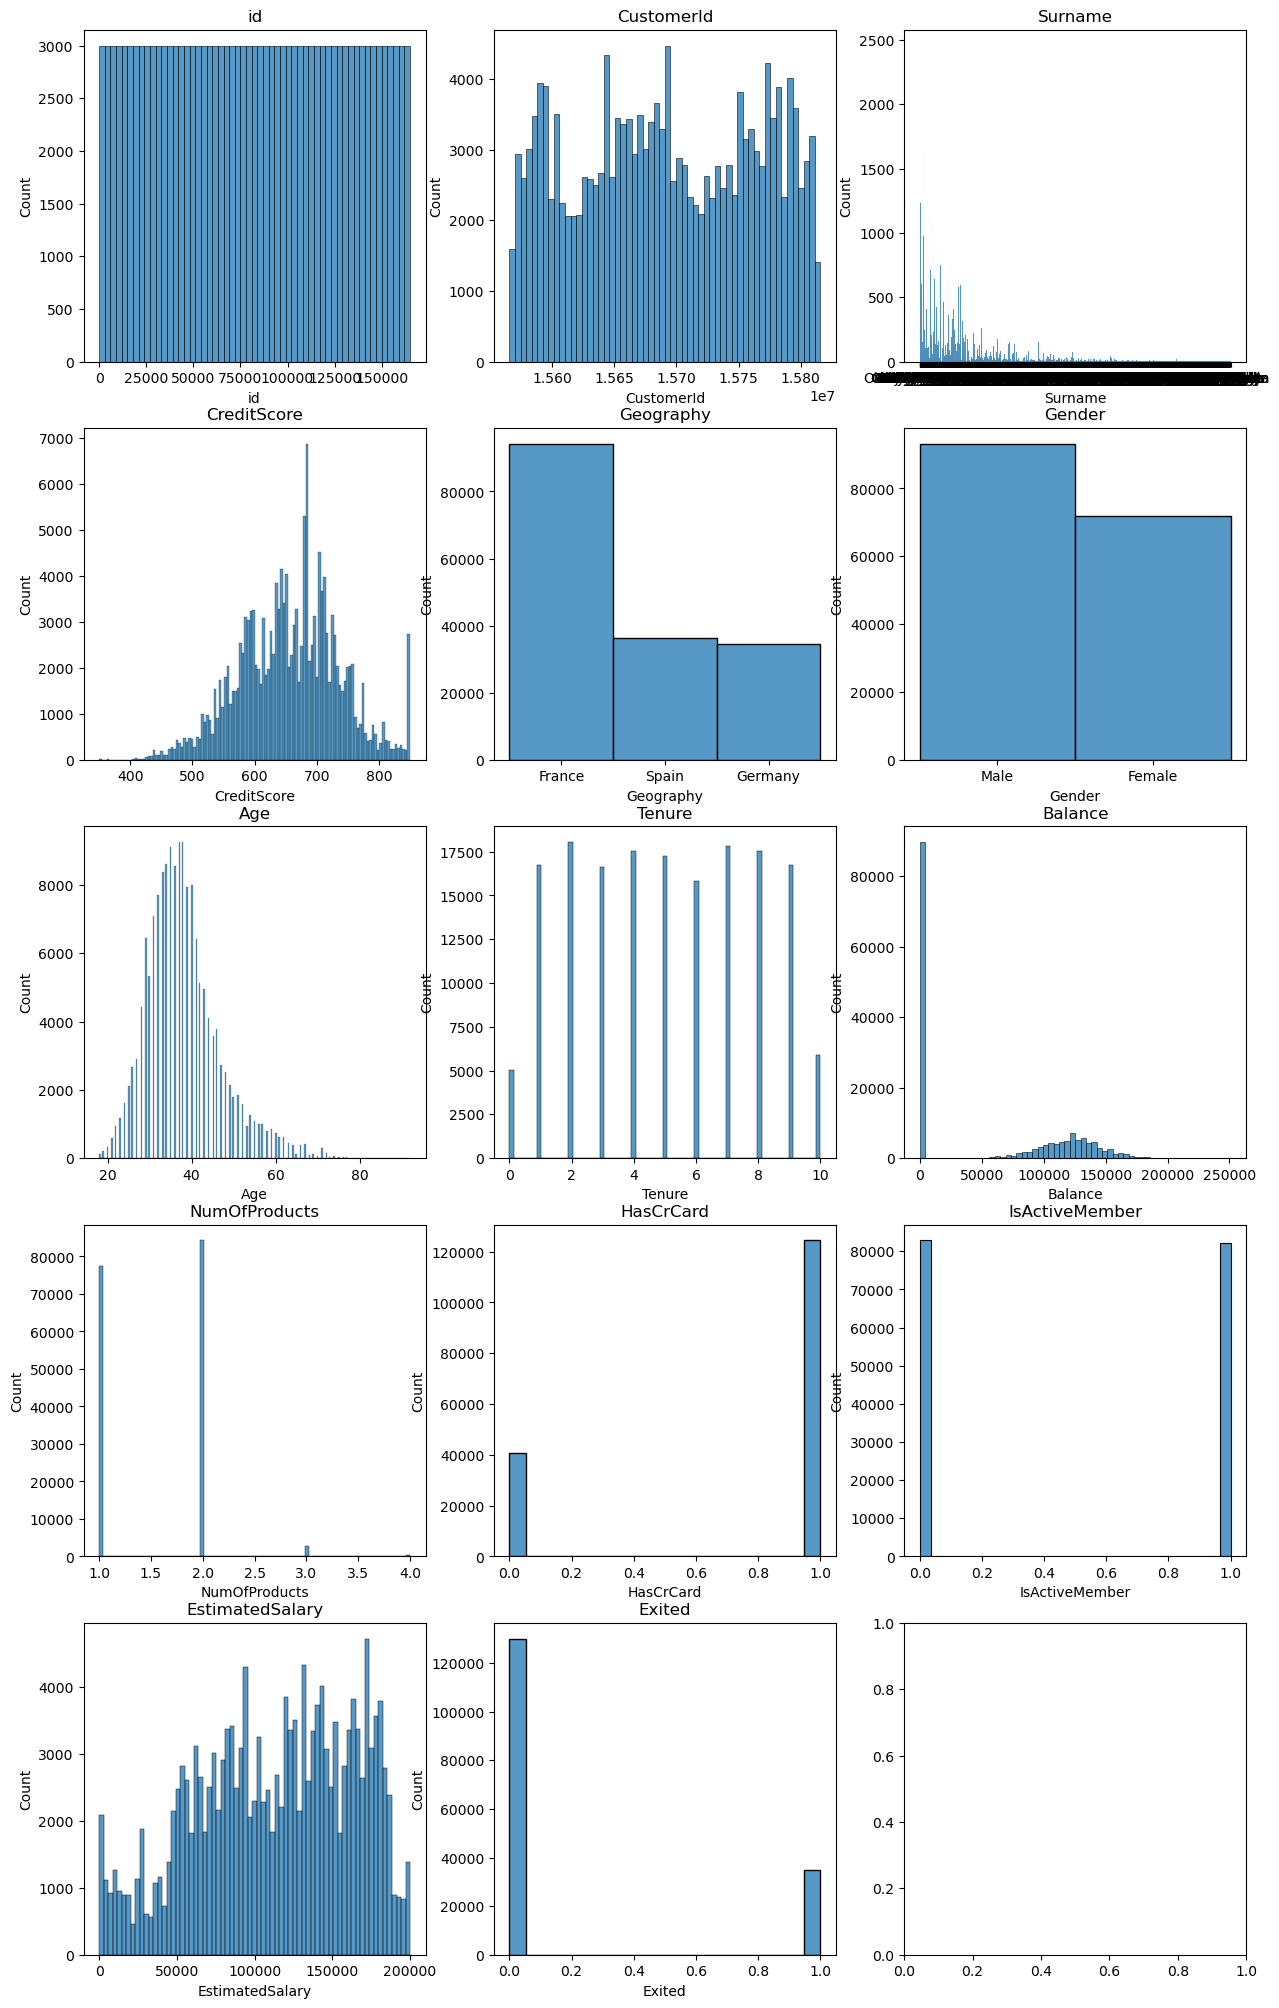

In [28]:
# --- HISTOGRAPH ---
n_columns = len(bank_data.columns)
n_hist_columns = 3
n_rows = -(-n_columns // n_hist_columns)  # Ceiling division to calculate number of rows


fig, axes = plt.subplots(nrows=n_rows, ncols=n_hist_columns, figsize=(15, 5 * n_rows))
if n_rows == 1:
    axes = [axes]

for i, col in enumerate(bank_data.columns):
    ax = axes[i // n_hist_columns][i % n_hist_columns]
    sns.histplot(bank_data[col], ax=ax)
    ax.set_title(col)


<AxesSubplot: >

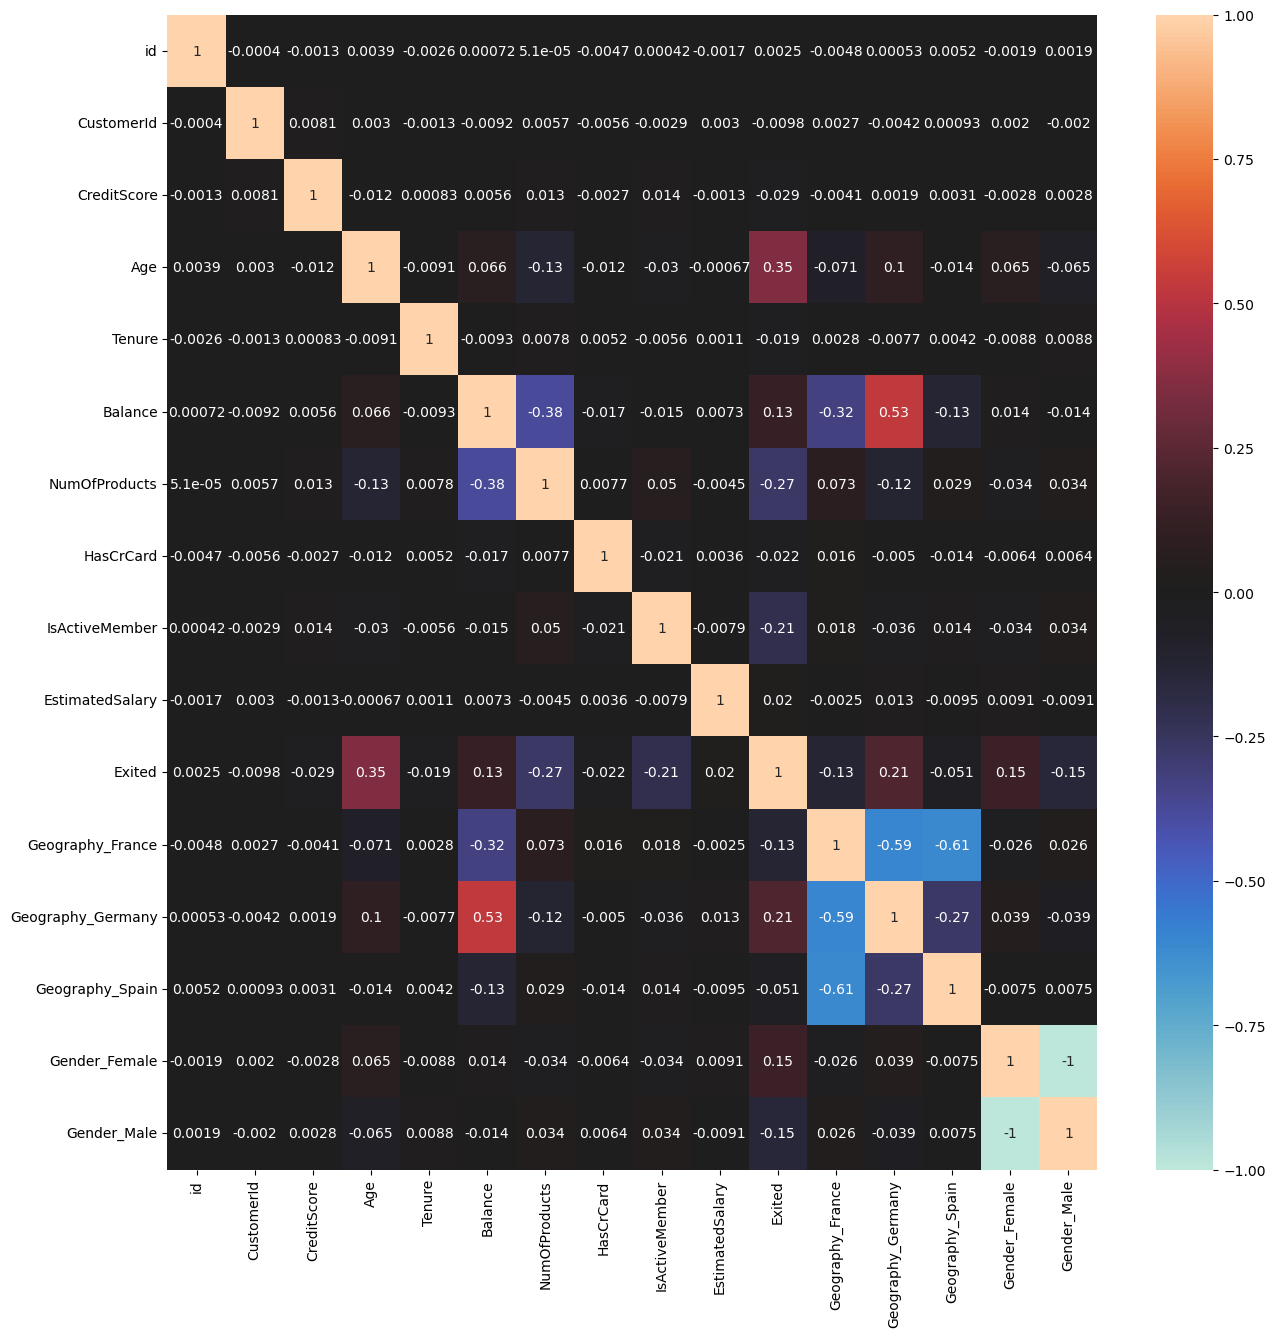

In [34]:
# --- CORRELATION MATRIX ---
plt.figure(figsize=(15, 15))
sns.heatmap(pd.get_dummies(bank_data.drop(columns=["Surname"])).corr("spearman"), annot=True, vmax=1, vmin=-1, center=0)